## Mask2Former

Source: https://debuggercafe.com/multi-class-segmentation-using-mask2former/

#### Dataset preparation

0. Background: [0, 0, 0]
1. Building-flooded: [196, 0, 0]
2. Building-non-flooded: [255,128,128]
3. Road-flooded: [128, 128, 0]  
4. Road-non-flooded: [128, 128, 128]
5. Water: [0, 191, 255] 
6. Tree: [34, 139, 34]
7. Vehicle: [123, 37, 118]
8. Pool: [0, 68, 255] 
9. Grass: [127, 224, 104]

At the moment, our dataset masks contains values as (1,2, ...., 9) but for maskformer we need to label them color wise and the color mapping is mentioned above.

In [27]:
import cv2

image_path = r"E:\Post-Flood-Disaster-Management\Segmentation\Segmentation-2\Mask2Former\input\road_seg\test\masks\6695.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (4000, 3000))
print(image.shape)

(3000, 4000)


In [28]:
image[0]

array([9, 9, 9, ..., 9, 9, 9], dtype=uint8)

In [22]:
import numpy as np

def convert_image(image, color_mapping):
    """
    Convert an image using specified color mapping.

    Parameters:
        image (numpy.ndarray): Input image.
        color_mapping (dict): Dictionary containing color mappings.

    Returns:
        numpy.ndarray: Converted image.
    """
    converted_image = np.zeros((*image.shape, 3), dtype=np.uint8)

    for label, color in color_mapping.items():
        mask = (image == label)
        converted_image[mask] = color

    return converted_image

# Color mapping dictionary
color_mapping = {
    0: [0, 0, 0],
    1: [196, 0, 0],
    2: [255, 128, 128],
    3: [128, 128, 0],
    4: [128, 128, 128],
    5: [0, 191, 255],
    6: [34, 139, 34],
    7: [123, 37, 118],
    8: [0, 68, 255],
    9: [127, 224, 104]
}

# Example usage
input_image = np.array([[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]])

converted_image = convert_image(input_image, color_mapping)
print("Converted Image:")
print(converted_image)


Converted Image:
[[[196   0   0]
  [255 128 128]
  [128 128   0]]

 [[128 128 128]
  [  0 191 255]
  [ 34 139  34]]

 [[123  37 118]
  [  0  68 255]
  [127 224 104]]]


In [8]:
import numpy as np

def invert_image(converted_image, color_mapping):
    """
    Invert a converted image back to the original labels.

    Parameters:
        converted_image (numpy.ndarray): Converted image.
        color_mapping (dict): Dictionary containing color mappings.

    Returns:
        numpy.ndarray: Inverted image.
    """
    inverted_image = np.zeros(converted_image.shape[:2], dtype=np.uint8)

    for label, color in color_mapping.items():
        mask = np.all(converted_image == color, axis=-1)
        inverted_image[mask] = label

    return inverted_image

# Color mapping dictionary
color_mapping = {
    0: [0, 0, 0],
    1: [196, 0, 0],
    2: [255, 128, 128],
    3: [128, 128, 0],
    4: [128, 128, 128],
    5: [0, 191, 255],
    6: [34, 139, 34],
    7: [123, 37, 118],
    8: [0, 68, 255],
    9: [127, 224, 104]
}

# Example usage
converted_image = np.array([[[196,   0,   0], [255, 128, 128], [128, 128,   0]],
                            [[128, 128, 128], [  0, 191, 255], [ 34, 139,  34]],
                            [[123,  37, 118], [  0,  68, 255], [127, 224, 104]]], dtype=np.uint8)

inverted_image = invert_image(converted_image, color_mapping)
print("Inverted Image:")
print(inverted_image)

Inverted Image:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


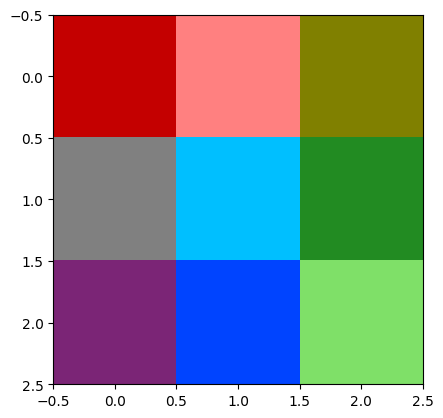

In [7]:
import matplotlib.pyplot as plt

plt.imshow(converted_image)

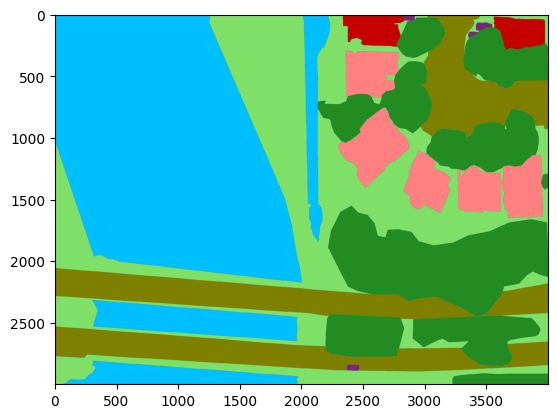

In [30]:
color_mapping = {
    1: [196, 0, 0],
    2: [255, 128, 128],
    3: [128, 128, 0],
    4: [128, 128, 128],
    5: [0, 191, 255],
    6: [34, 139, 34],
    7: [123, 37, 118],
    8: [0, 68, 255],
    9: [127, 224, 104]
}


img = convert_image(image, color_mapping)
plt.imshow(img)

In [41]:
from tqdm import tqdm
import os

dataset_dir = 'E:\Segmentation\datasets\FloodNet-MetaFormer'

for folder in os.listdir(dataset_dir):
    for file in tqdm(os.listdir(f'{dataset_dir}\{folder}\{folder}-label-img')):
        img = cv2.imread(f'{dataset_dir}\{folder}\{folder}-label-img\{file}', cv2.IMREAD_GRAYSCALE)
        img = convert_image(img, color_mapping)
        cv2.imwrite(f'{dataset_dir}\{folder}\{folder}-label-img\{file}', img)

100%|██████████| 450/450 [04:13<00:00,  1.77it/s]
